# Exercise 1
Assume that: 
- $\mu^{\text{blue}}_m$ = 25.0. 
- $\sigma^{\text{blue}}_m$ = 3.0.
- $\mu^{\text{blue}}_s$ = 5.0. 
- $\sigma^{\text{blue}}_s$ = 5.0. 
- $\mu^{\text{red}}_m$ = 30.0. 
- $\sigma^{\text{red}}_m$ = 3.0. 
- $\mu^{\text{red}}_s$ = 3.5. 
- $\sigma^{\text{red}}_s$ = 2.5. 
- $\sigma_u$ = 0.5.
- $\bar{p}$ = 155.
- $p_m$ = 13.5.
- $p_s$ = 6.5.

With these parameter values:
1. Create a Dataframe that contains all synthetic data.
2. Plot histograms for each variable/type.
3. Plot correlation between wages and its determinants.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [12.0,6.0] # Modifies the defult size of plots [6.0,4.0] inches

In [2]:
# Define parameters
mu_m_b = 25
sigma_m_b = 3.0
mu_s_b = 5.0
sigma_s_b = 5.0
mu_m_r = 30.0
sigma_m_r = 3.0
mu_s_r = 3.5
sigma_s_r = 2.5
sigma_u = 0.5
p_bar = 155
p_m = 13.5
p_s = 6.5
N = 5000


# Create Dataframe for blues
m_b = pd.Series(np.random.normal(mu_m_b, sigma_m_b, N), name = 'Memory')
s_b = pd.Series(np.random.normal(mu_s_b, sigma_s_b, N), name = 'Speed')
u_b = pd.Series(np.random.normal(0, sigma_u, N), name = 'Match Quality')
dfblue = pd.DataFrame({
    'Memory': m_b,
    'Speed': s_b,
    'Match Quality': u_b,
    'Type': 0,
    'Type Name': 'Blue'
})

# Create Dataframe for reds
m_r = pd.Series(np.random.normal(mu_m_r, sigma_m_r, N), name = 'Memory')
s_r = pd.Series(np.random.normal(mu_s_r, sigma_s_r, N), name = 'Speed')
u_r = pd.Series(np.random.normal(0, sigma_u, N), name = 'Match Quality')
dfred = pd.DataFrame({
    'Memory': m_r,
    'Speed': s_r,
    'Match Quality': u_r,
    'Type': 1,
    'Type Name': 'Red'
})

# Concatenate Dataframes
df = pd.concat([dfblue, dfred], ignore_index=True)
df['Wage'] = p_bar + p_m*df['Memory'] + p_s*df['Speed'] + df['Match Quality']
df

,Memory,Speed,Match Quality,Type,Type Name,Wage
0,21.085137,7.157212,0.047890,0,Blue,486.219117
1,27.955254,12.285500,0.137749,0,Blue,612.389425
2,20.990063,7.862706,0.252162,0,Blue,489.725600
3,23.310482,7.332594,-0.647332,0,Blue,516.706035
4,28.778752,2.884708,-0.226719,0,Blue,562.037038
...,...,...,...,...,...,...
9995,34.114064,2.626332,-0.304742,1,Red,632.306283
9996,32.915531,2.142251,-0.354563,1,Red,612.929732
9997,31.884479,6.911664,-1.665255,1,Red,628.701022
9998,32.731516,2.067600,0.222483,1,Red,610.537350


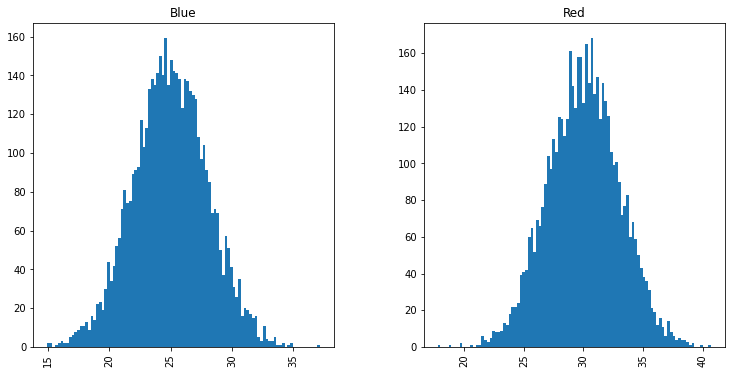

In [3]:
# Plot Memory histogram
df.hist(column = 'Memory', by = 'Type Name', bins = 100)
plt.show()

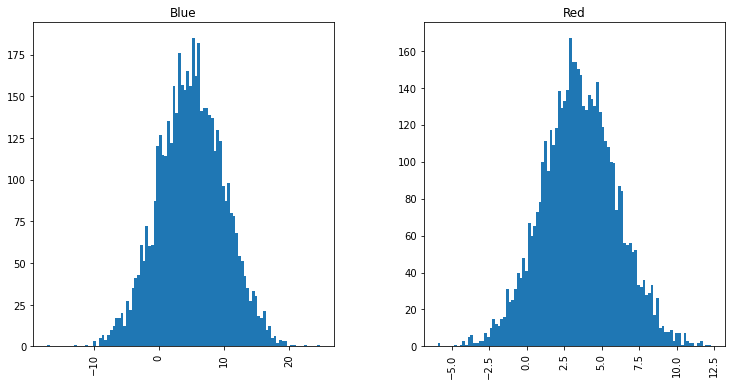

In [4]:
# Plot Speed histogram
df.hist(column = 'Speed', by = 'Type Name', bins = 100)
plt.show()

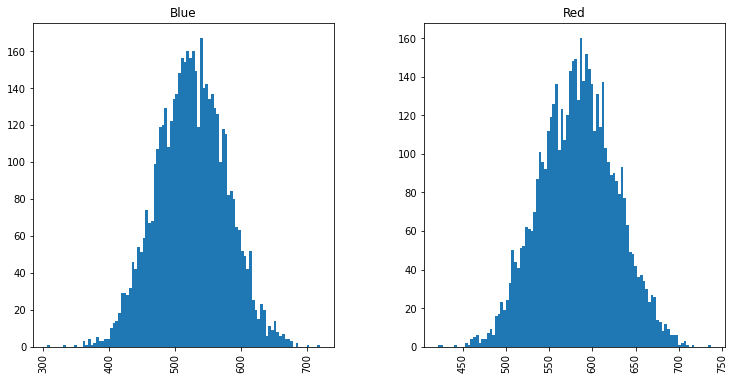

In [5]:
# Plot Wage histogram
df.hist(column = 'Wage', by = 'Type Name', bins = 100)
plt.show()

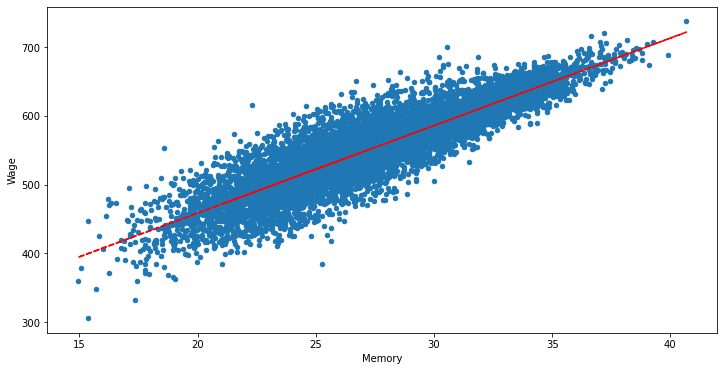

In [6]:
# Correlation between Memory and Wage
x = df['Memory']
y = df['Wage']
df.plot(x = 'Memory', y = 'Wage', kind = 'scatter')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x),"r--")
plt.show()

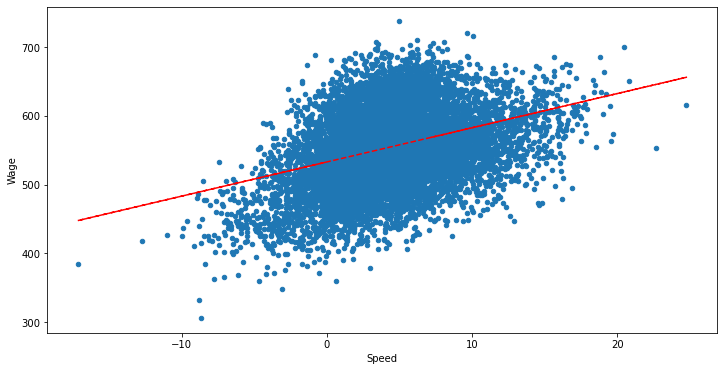

In [7]:
# Correlation between Speed and Wage
x = df['Speed']
y = df['Wage']
df.plot(x = 'Speed', y = 'Wage', kind = 'scatter')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x),"r--")
plt.show()

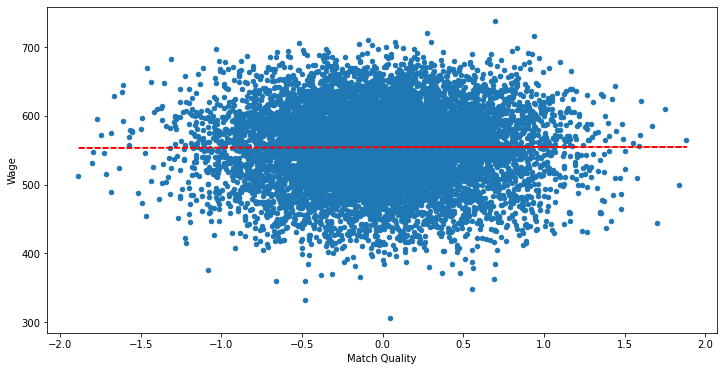

In [8]:
# Correlation between Quality Match and Wage
x = df['Match Quality']
y = df['Wage']
df.plot(x = 'Match Quality', y = 'Wage', kind = 'scatter')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x),"r--")
plt.show()

# Exercise 2
Use the module [statsmodel](https://www.statsmodels.org/stable/index.html) to estimate the prices.

In [9]:
import statsmodels.api as sm

# Create constant
df['constant'] = 1

# Define model
MyModel = sm.OLS(endog = df['Wage'], 
                 exog = df[['constant', 'Memory', 'Speed']])

# Print results
results = MyModel.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.406e+07
Date:                Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:36:17   Log-Likelihood:                -7199.0
No. Observations:               10000   AIC:                         1.440e+04
Df Residuals:                    9997   BIC:                         1.443e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant     155.0057      0.036   4251.839      0.0

# Exercise 3
Unconditional differences in wages between groups.

In [13]:
df[['Wage', 'Type Name']].groupby('Type Name').describe()

Wage                                                             \
            count        mean        std         min         25%         50%   
Type Name                                                                      
Blue       5000.0  525.047101  52.340400  305.901742  488.464709  524.924983   
Red        5000.0  583.186316  43.647797  420.754869  552.759806  583.866434   

                                   
                  75%         max  
Type Name                          
Blue       560.961013  719.923302  
Red        612.935284  737.250001

Model with omitted variables.

In [14]:
# Define model
Omitted = sm.OLS(endog = df['Wage'], 
                 exog = df[['constant', 'Memory', 'Type']])

# Print results
results = Omitted.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                 1.887e+04
Date:                Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:37:59   Log-Likelihood:                -46674.
No. Observations:               10000   AIC:                         9.335e+04
Df Residuals:                    9997   BIC:                         9.338e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant     187.0955      2.168     86.301      0.0

# Exercise 4
Load data from Acemoglu, Johnson, and Robinson (AER-2001) and:
1. Bar plot their GDP measure (`logpgp95`) and their measure of instiutional quality (`avexpr`).
2. Ilustrate the correlation between these two variables.

In [15]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [17]:
MyFolder = '/content/drive/My Drive/Colab Notebooks/2021_2022_Programming_for_Statistical_Analysis/'
MyFile = MyFolder + 'Data_AJR_2001.dta' 

In [ ]:
# Load data
dfAJR = pd.read_stata(MyFile)
 
# Set proper index (Country abbreviation)
dfAJR.index = dfAJR['shortnam']
dfAJR = dfAJR.drop(columns = ['shortnam'])
dfAJR

In [18]:
# Bar plot a sample of N countries
N = 25
aux_dfAJR = dfAJR.sample(n = N, random_state = 1)


# Bar plot GDP
aux_dfAJR.sort_values('logpgp95', ascending=False)['logpgp95'].dropna().plot(kind='bar')
plt.ylabel('Log of per capita GPD in 1995')
plt.xlabel('Countries')
plt.title('Sample of {} Countries'.format(N))
plt.show()

NameError: name 'dfAJR' is not defined

In [ ]:
# Bar plot Expropiation Index
aux_dfAJR.sort_values('avexpr', ascending=False)['avexpr'].dropna().plot(kind='bar')
plt.ylabel('Index of protection against expropiation (Average 1985-95)')
plt.xlabel('Countries')
plt.title('Sample of {} Countries'.format(N))
plt.show()

In [ ]:
# Correlation between GDP and Expropiation Index
aux_dfAJR = dfAJR.dropna(subset=['logpgp95', 'avexpr'])
x = aux_dfAJR['avexpr']
y = aux_dfAJR['logpgp95']
aux_dfAJR.plot(x = 'avexpr', y = 'logpgp95', kind = 'scatter')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x),"r--")
plt.xlabel('Index of protection against expropiation (Average 1985-95)')
plt.ylabel('Log of per capita GPD in 1995')
plt.show()

In [ ]:
# Create constant
dfAJR['constant'] = 1

# Define model
MyModel = sm.OLS(endog = dfAJR['logpgp95'], 
                 exog = dfAJR[['constant', 'avexpr']], missing = 'drop')

# Print results
results = MyModel.fit()
print(results.summary())